# Log metric

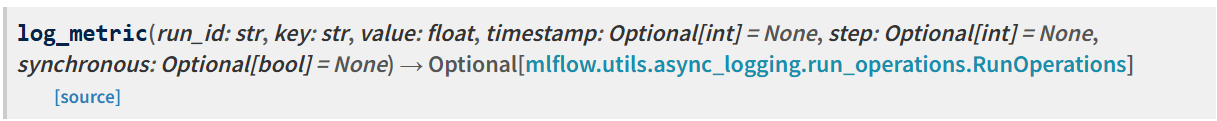

In [1]:
import mlflow 

## Log a single metric

In [ ]:
# starting a run.

with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metric("m1", 2.0)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()


run_id: de4cb322f3ec4355984a00688f011c71


{'metrics': {'m1': 2.0},
 'params': {},
 'tags': {'mlflow.runName': 'gaudy-hen-491',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

## Log multiple metrics

In [8]:
#starting a run

metrics = {
    "m1": 2.0,
    "m2": 3.0,
    "m3": 4.0
}
with mlflow.start_run(run_name="logging_metrics") as run:
    mlflow.log_metrics(metrics)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: 831f4820473b47bd8023e95d2eb81cea


{'metrics': {'m1': 2.0, 'm2': 3.0, 'm3': 4.0},
 'params': {},
 'tags': {'mlflow.runName': 'bedecked-gnat-463',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

## Log metric providing a run id

In [9]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0",run_name="logging_metrics")
run_id = run.info.run_id

# log a metric
mlflow.log_metric(key="m1", value=1.0, run_id=run_id)

# log multiple metrics
metrics = {
    "m2": 2.0,
    "m3": 3.0
}
mlflow.log_metrics(metrics, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

In [10]:
# check the run data
run = mlflow.get_run(run_id)

print("run_id: {}".format(run.info.run_id))
print("status: {}".format(run.info.status))
run.data.to_dictionary()

run_id: fd2f6e05970249deb7acff1d226b06e4
status: FINISHED


{'metrics': {'m1': 1.0, 'm2': 2.0, 'm3': 3.0},
 'params': {},
 'tags': {'mlflow.runName': 'fun-grub-0'}}

# Log a Parameter

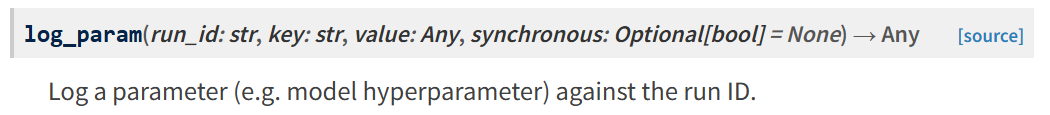

## Log a single parameter

In [11]:
# starting a run.
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_param("p1", 1)

# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: 4817bf180cce444d8eadb0a0819d81a0


{'metrics': {},
 'params': {'p1': '1'},
 'tags': {'mlflow.runName': 'classy-hog-349',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

## Log multiple parameters

In [12]:
parameters = {
    "p1": 1,
    "p2": 2,
    "p3": 3
}
with mlflow.start_run(run_name="logging_parameters") as run:
    mlflow.log_params(parameters)
    
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: 36f3ff0d9ecb4f20ab064f44c307d308


{'metrics': {},
 'params': {'p1': '1', 'p2': '2', 'p3': '3'},
 'tags': {'mlflow.runName': 'legendary-zebra-779',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

## Log multiple parameters providing run id

In [ ]:
client = mlflow.MlflowClient()

#create a run
run = client.create_run(experiment_id="0", run_name="logging_parameters")
run_id = run.info.run_id

# log a parameter
# mlflow.log_param does not accept run_id as an argument
try:
    mlflow.log_param(key="p1", value="some value", run_id=run_id)
except Exception as e:
    print("ERROR:", e)

ERROR: log_param() got an unexpected keyword argument 'run_id'


In [17]:
# using client to log a parameter providing the run_id
client.log_param(run_id, "p1", "some value")

# log multiple parameters
parameters = {
    "p2": 2.0,
    "p3": "param 3"
}
mlflow.log_params(parameters, run_id=run_id)


# end the run
client.set_terminated(run_id, status="FINISHED")

In [18]:
# getting the run id and data
run = mlflow.get_run(run.info.run_id)
print("run_id:", run.info.run_id)
run.data.to_dictionary()

run_id: 27e9e3b7236b4e44b284f5c79058c208


{'metrics': {},
 'params': {'p1': 'some value', 'p2': '2.0', 'p3': 'param 3'},
 'tags': {'mlflow.runName': 'exultant-dove-439'}}

# NOTE

Using log param without run context.

In [ ]:
print("BEFORE USING LOG_PARAM")
run = mlflow.active_run()
print("RUN")
print(run)

# using log_param
# ----------------------------------------------------------------
mlflow.log_param("p1", 1)
# ----------------------------------------------------------------

print("AFTER USING LOG_PARAM:")
print("RUN")
# retrieving the run id and data
run_id = mlflow.active_run().info.run_id
run = mlflow.get_run(run_id)
run.data.to_dictionary()


BEFORE USING LOG_PARAM
RUN
None
AFTER USING LOG_PARAM:
RUN


{'metrics': {},
 'params': {'p1': '1'},
 'tags': {'mlflow.runName': 'incongruous-dove-810',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

In [28]:
mlflow.end_run()

# Log

## Log a single artifact

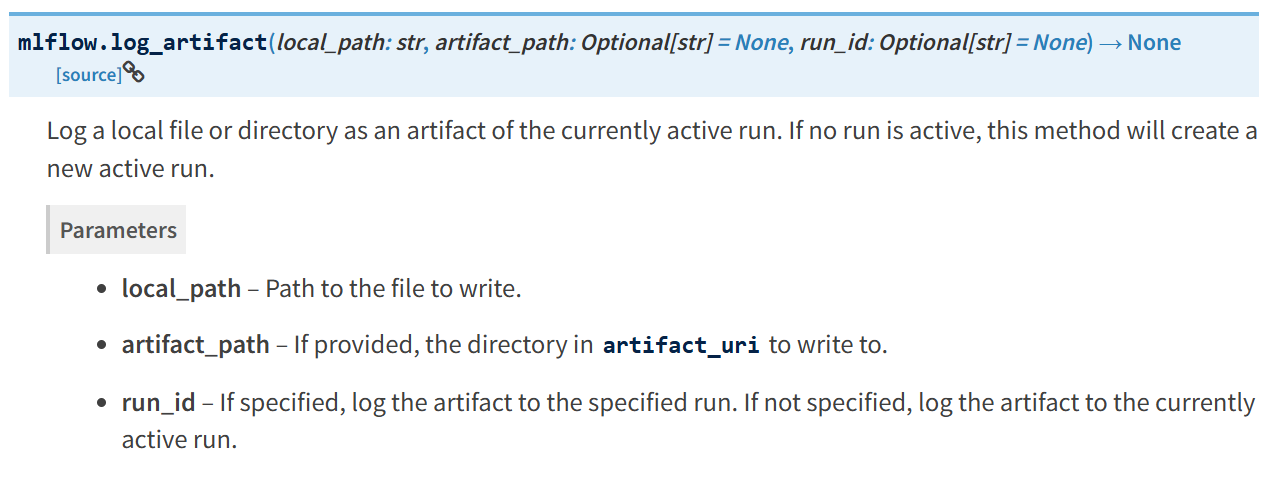

In [12]:
from pathlib import Path 

path = Path("artifacts_example/predictions.csv")

In [13]:
# starting a run.
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifact(path)

## Log multiple artifacts

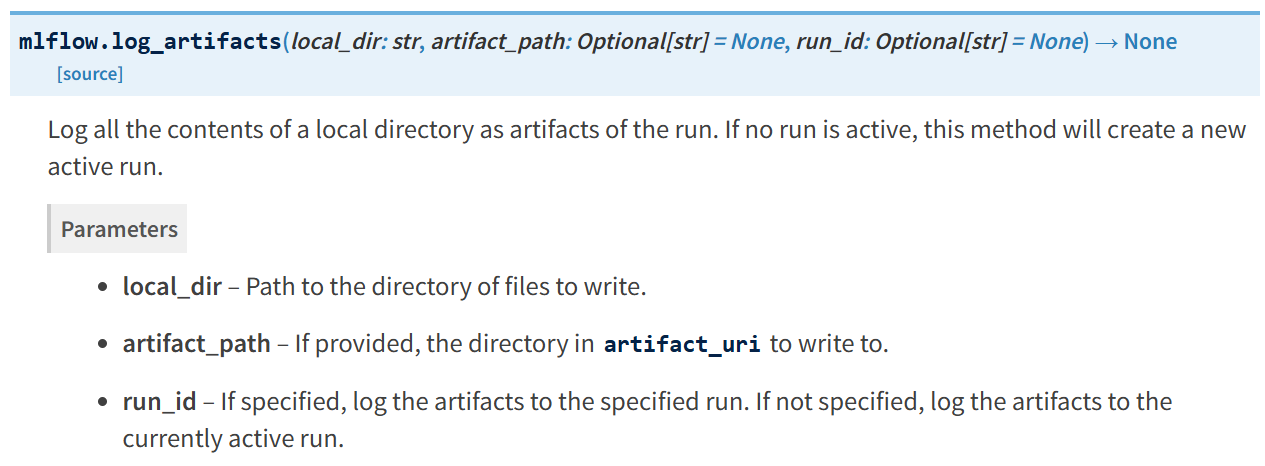

In [14]:
# starting a run
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example")

In [15]:
# starting a run and providing artifact_path
with mlflow.start_run(run_name="logging_artifacts") as run:
    mlflow.log_artifacts("artifacts_example", artifact_path="my_artifacts")

# Log a Dictionary

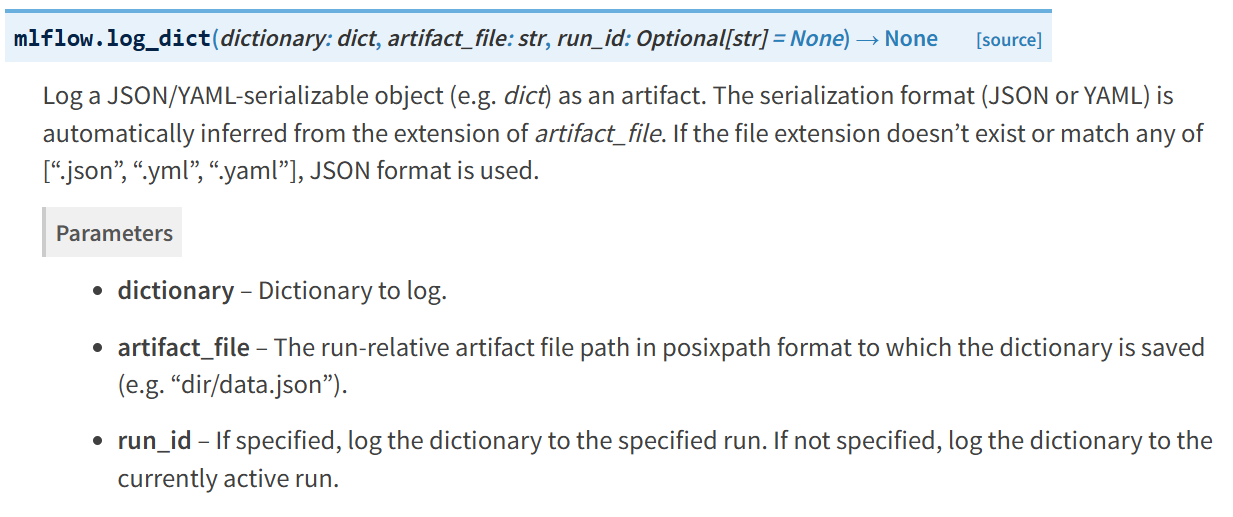

In [19]:
# starting a run 
with mlflow.start_run(run_name="logging_artifacts") as run:
    dictionary = {
        "predictions.csv": "artifacts_example/predictions.csv",
        "model.pkl": "artifacts_example/model.pkl"
    }

    # Using json file
    mlflow.log_dict(dictionary= dictionary, artifact_file="my_files.json")

    # Using yaml file
    mlflow.log_dict(dictionary=dictionary, artifact_file="my_files.yaml")
